CNN to classify the Gender classification

In [71]:
#Import library for read data and label and implement model 
import numpy as np 
import pandas as pd 
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
#import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation
, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical


In [73]:
#os.chdir('UTKFace')
path = "UTKFace"

In [63]:
#Get all file image in the dataset
files = os.listdir()
# Check length datast
len(files)

19508

In [64]:
#Get the label for the gender
shuffle(files)
gender = [i.split('_')[1] for i in files]


In [65]:
#Labels for all the classes
Labels = []
for i in gender:
    i = int(i)
    Labels.append(i)


In [66]:
#Get the data
X_data =[]
import imageio
import cv2
for file in files:
    face = imageio.imread(file)
    #Reshape image to 32,32,3
    face = cv2.resize(face, (32, 32) )
    X_data.append(face)


In [67]:
X = np.squeeze(X_data)
#X.shape()

In [68]:
# normalize data
X = X.astype('float32')
X /= 255

In [69]:
#One hot encode label
categorical_labels = to_categorical(Labels, num_classes=2)


In [70]:
#Split data into traning/testing 90/10 
#Split data to train
#data = np.array(data)
#lanels = np.array(labels)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, categorical_labels, test_size=0.1,
                                                 random_state=42)


In [32]:
#Build the model CNN for Gender classification
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
#model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Take a look at the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 128)      

In [33]:
#Complie the model
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [34]:
#Fit training model
history_training = model.fit(x_train, y_train,
                            batch_size=128,
                            epochs=100,
                            validation_split= 0.1,)


Epoch 1/100
124/124 [==============================] - 76s 612ms/step - loss: 1.0053 - accuracy: 0.7662 - val_loss: 0.6044 - val_accuracy: 0.6372
Epoch 2/100
124/124 [==============================] - 74s 600ms/step - loss: 0.4269 - accuracy: 0.8350 - val_loss: 0.4612 - val_accuracy: 0.8018
Epoch 3/100
124/124 [==============================] - 74s 596ms/step - loss: 0.3500 - accuracy: 0.8627 - val_loss: 0.6181 - val_accuracy: 0.6908
Epoch 4/100
124/124 [==============================] - 74s 595ms/step - loss: 0.3305 - accuracy: 0.8642 - val_loss: 0.2754 - val_accuracy: 0.8713
Epoch 5/100
124/124 [==============================] - 74s 593ms/step - loss: 0.2782 - accuracy: 0.8876 - val_loss: 0.2574 - val_accuracy: 0.8844
Epoch 6/100
124/124 [==============================] - 74s 598ms/step - loss: 0.2614 - accuracy: 0.8927 - val_loss: 0.2629 - val_accuracy: 0.8878
Epoch 7/100
124/124 [==============================] - 74s 594ms/step - loss: 0.2395 - accuracy: 0.9041 - val_loss: 0.2532 -

Epoch 57/100
124/124 [==============================] - 74s 599ms/step - loss: 0.0511 - accuracy: 0.9837 - val_loss: 0.3399 - val_accuracy: 0.9060
Epoch 58/100
124/124 [==============================] - 75s 603ms/step - loss: 0.0464 - accuracy: 0.9838 - val_loss: 0.3199 - val_accuracy: 0.9123
Epoch 59/100
124/124 [==============================] - 75s 601ms/step - loss: 0.0519 - accuracy: 0.9818 - val_loss: 0.3060 - val_accuracy: 0.9106
Epoch 60/100
124/124 [==============================] - 75s 603ms/step - loss: 0.0426 - accuracy: 0.9854 - val_loss: 0.3468 - val_accuracy: 0.9095
Epoch 61/100
124/124 [==============================] - 75s 605ms/step - loss: 0.0472 - accuracy: 0.9849 - val_loss: 0.3676 - val_accuracy: 0.9077
Epoch 62/100
124/124 [==============================] - 74s 599ms/step - loss: 0.0515 - accuracy: 0.9830 - val_loss: 0.3624 - val_accuracy: 0.8992
Epoch 63/100
124/124 [==============================] - 74s 596ms/step - loss: 0.0442 - accuracy: 0.9851 - val_loss: 0

In [39]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy

print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.8928754329681396


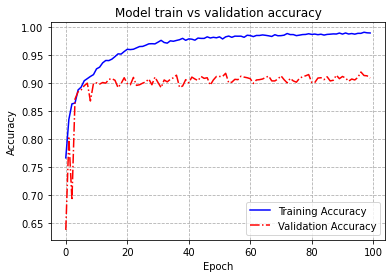

In [41]:
# Plot a graph of 'accuracy' and validation accuracy 
import matplotlib.pyplot as plt

plt.plot(history_training.history['accuracy'], c='b')
plt.plot(history_training.history['val_accuracy'], '-.', c='r')
plt.title('Model train vs validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid(linestyle='--')
plt.show()

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.metrics import classification_report_imbalanced
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
import itertools

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

    
def plot_confusion_matrix(cm, classes=None,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    mpl.rcParams.update(mpl.rcParamsDefault)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #classes = ('0','1')
    print(cm)
    plt.figure(figsize=(5, 5)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.75)
    tick_marks = np.arange(len(list(range(cm.shape[0]))))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes,rotation=45)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    return plt